In [1]:
print("GET ON WiTH FUNKOT")
import pandas as pd
import numpy as np
import os,sys
import matplotlib.pyplot as plt
import mglearn

GET ON WiTH FUNKOT


Text(0, 0.5, 'Feature 1')

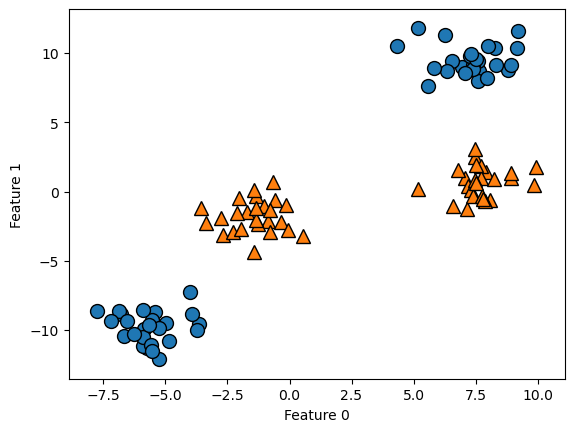

In [2]:
#数据集
from sklearn.datasets import make_blobs
X,y = make_blobs(centers=4,random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

D:\Anaconda3\envs\sk-learn-py\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Text(0, 0.5, 'Feature 1')

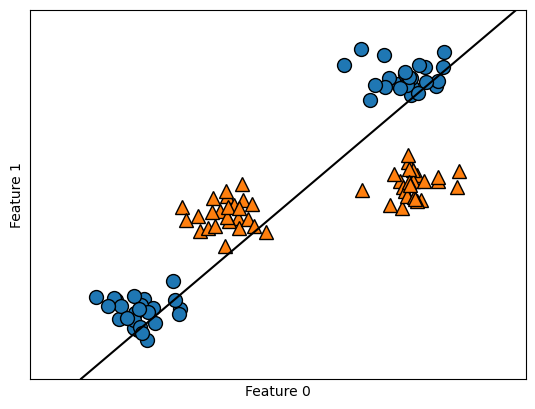

In [3]:
#示例：线性支持向量机LinearSVC无法划分
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X,y)
mglearn.plots.plot_2d_separator(linear_svm,X)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")


In [4]:
#添加一个新特征：特征2的平方
X_new = np.hstack([X,X[:,1:] ** 2])
from mpl_toolkits.mplot3d import Axes3D,axes3d
figure = plt.figure()
#3D可视化
ax = Axes3D(figure,elev=-152,azim=-26)
#ax = Axes3D(figure)

mask = y == 0
ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2],'b',s=60)
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],'r',marker='^',s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")
#jupyter出问题？画不出图

Text(0.5, 0, 'feature1 ** 2')

<Figure size 640x480 with 0 Axes>

In [5]:
linear_svm_3d = LinearSVC().fit(X_new,y)
coef,intercept = linear_svm_3d.coef_.ravel(),linear_svm_3d.intercept_

figure = plt.figure()
ax = Axes3D(figure,elev=-152,azim=-26)
xx = np.linspace(X_new[:,0].min()-2,X_new[:,0].max()+2,50)
yy = np.linspace(X_new[:,1].min()-2,X_new[:,1].max()+2,50)
#生成二维网格坐标
XX,YY = np.meshgrid(xx,yy)

ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX,YY,ZZ,rstride=8,cstride=8,alpha=0.3)
ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2],c='b',cmap=mglearn.cm2,s=60)
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],c='r',marker='^',cmap=mglearn.cm2,s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")


D:\Anaconda3\envs\sk-learn-py\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\zzdus\AppData\Local\Temp\ipykernel_18940\1162806441.py:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2],c='b',cmap=mglearn.cm2,s=60)
C:\Users\zzdus\AppData\Local\Temp\ipykernel_18940\1162806441.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],c='r',marker='^',cmap=mglearn.cm2,s=60)


Text(0.5, 0, 'feature1 ** 2')

<Figure size 640x480 with 0 Axes>

Text(0, 0.5, 'Feature 1')

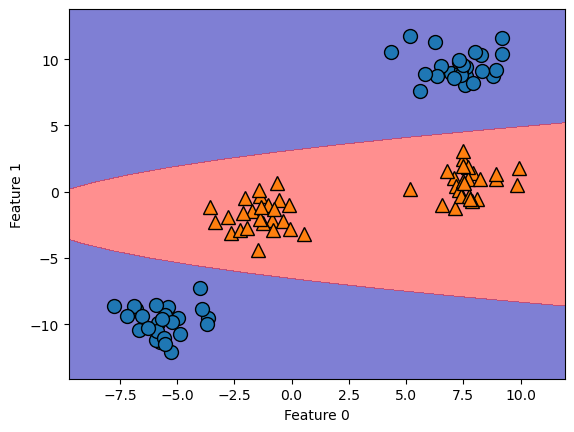

In [6]:
#决策边界作为两个原始特征的函数
ZZ = YY ** 2

dec = linear_svm_3d.decision_function(np.c_[XX.ravel(),YY.ravel(),ZZ.ravel()])

plt.contourf(XX,YY,dec.reshape(XX.shape),levels=[dec.min(),0,dec.max()],cmap=mglearn.cm2,alpha=0.5)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

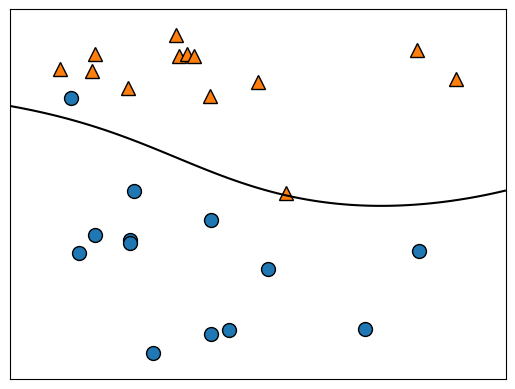

In [7]:
#SVM预测原理：测量新样本到每个支持向量的距离，预测结果取决于这些距离还有支持向量重要性

#forge数据集上训练SVM

from sklearn.svm import SVC
#核支持向量机
X,y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf',C=10,gamma=0.1).fit(X,y)
#使用了高斯核RBF(径向基函数核)
#数据点之间的距离由高斯核给出
mglearn.plots.plot_2d_separator(svm,X,eps=.5)
mglearn.discrete_scatter(X[:,0],X[:,1],y)


Text(0, 0.5, 'Feature 1')

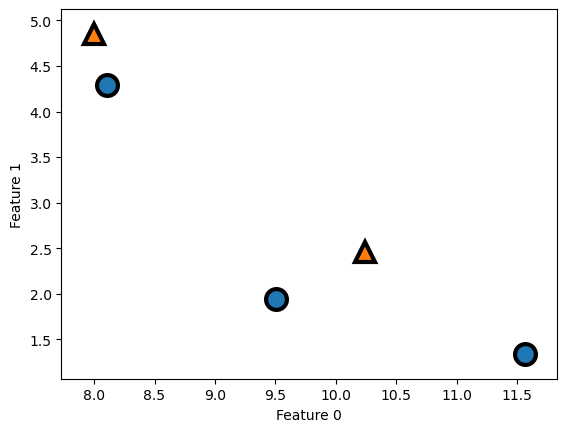

In [8]:
#画出支持向量
sv = svm.support_vectors_
#支持向量的类别标签由dual_coef_的正负号给出
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:,0],sv[:,1],sv_labels,s=15,markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

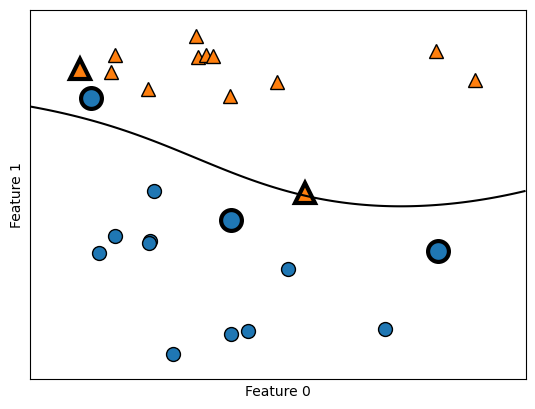

In [9]:
#把上两个框合在一起画图
mglearn.plots.plot_2d_separator(svm,X,eps=.5)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
mglearn.discrete_scatter(sv[:,0],sv[:,1],sv_labels,s=15,markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

[[<Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: >]]


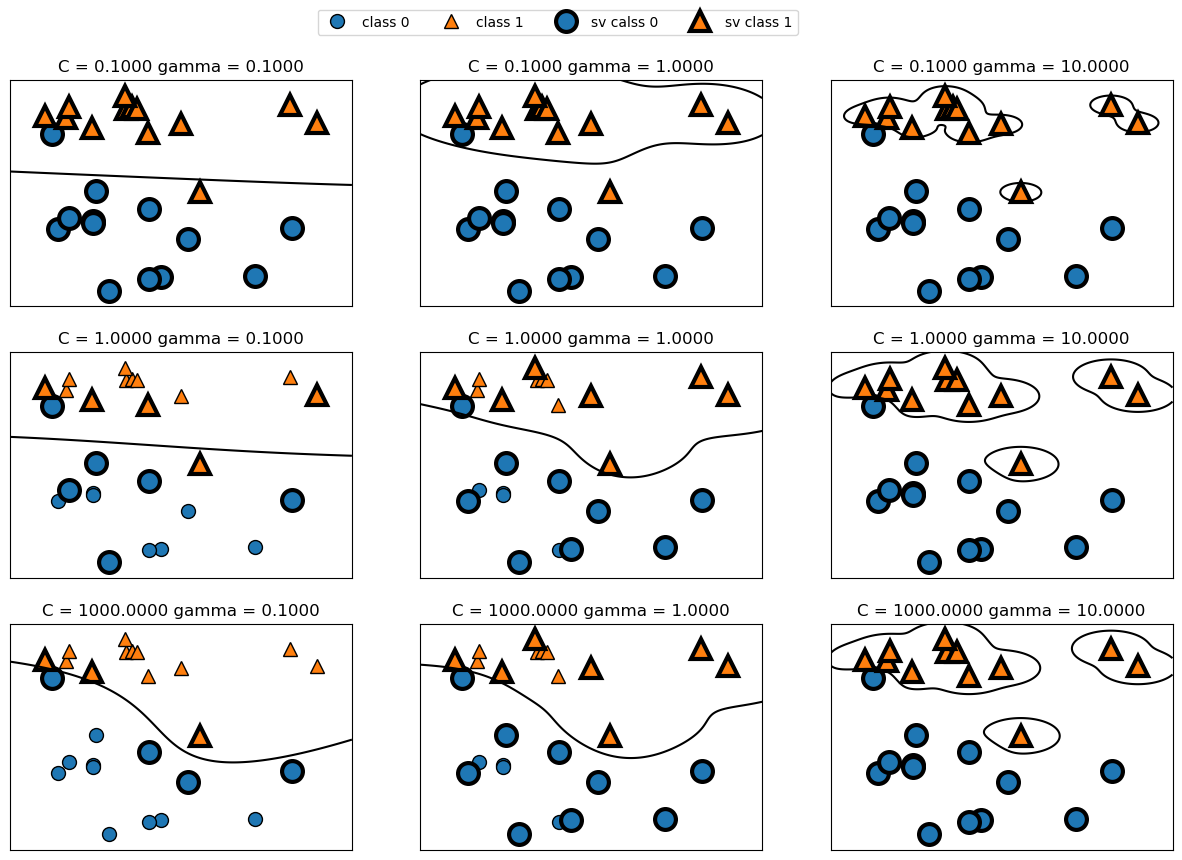

In [10]:
#SVM调参
#gamma参数
#C参数（正则化参数）
fig,axes = plt.subplots(3,3,figsize=(15,10))

print(axes) #二维数组

for ax,C in zip(axes,[-1,0,3]):
    for a,gamma in zip(ax,range(-1,2)):
        mglearn.plots.plot_svm(log_C=C,log_gamma=gamma,ax=a)

axes[0,0].legend(["class 0","class 1","sv calss 0","sv class 1"],ncol=4,loc=(.9,1.2))

#默认情况下 C=1，gamma = 1/n_features

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=0)
svc = SVC()
svc.fit(X_train,y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(X_train,y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test,y_test)))


Accuracy on training set: 0.90
Accuracy on test set: 0.94


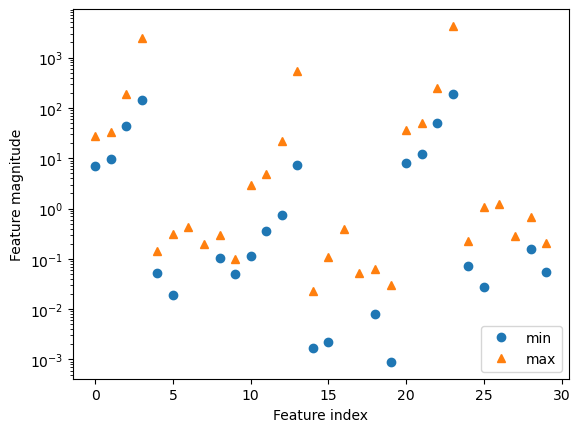

In [12]:
#画出每个特征的最小值和最大值
plt.plot(X_train.min(axis=0),'o',label="min")
plt.plot(X_train.max(axis=0),'^',label="max")
plt.legend(loc=4)
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")
plt.yscale("log")

### 不同的特征数量级不同，对线性模型是小问题，但对SVM有大影响


In [13]:
#预处理数据
#缩放——归一化
min_on_training = X_train.min(axis=0)
range_on_training = (X_train - min_on_training).max(axis=0)

X_train_scaled = (X_train - min_on_training) / range_on_training
print("Minimum for each feature\n{}".format(X_train_scaled.min(axis=0)))
print("Maximum for each feature\n {}".format(X_train_scaled.max(axis=0)))


Minimum for each feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [14]:
#测试集做相同变换
X_test_scaled = (X_test - min_on_training) / range_on_training
svc = SVC()
svc.fit(X_train_scaled,y_train)
print("Accuracy on training set: {:.3f}".format(svc.score(X_train_scaled,y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled,y_test)))

Accuracy on training set: 0.984
Accuracy on test set: 0.972


In [15]:
svc = SVC(C=1000)
svc.fit(X_train_scaled,y_train)
print("Accuracy on training set: {:.3f}".format(svc.score(X_train_scaled,y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled,y_test)))


Accuracy on training set: 1.000
Accuracy on test set: 0.958


## 神经网络（深度学习）

In [16]:
#多层感知机 MLP 前馈神经网络
display(mglearn.plots.plot_logistic_regression_graph())


ModuleNotFoundError: No module named 'graphviz'

In [17]:
display(mglearn.plots.plot_single_hidden_layer_graph())

ModuleNotFoundError: No module named 'graphviz'

Text(0, 0.5, 'relu(x)0,tanh(x)')

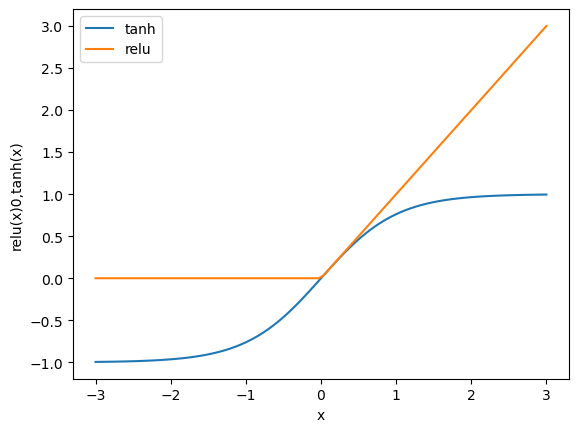

In [18]:
#介绍两个非线性函数 校正非线性（relu） 和 正切双曲线（tanh）
line = np.linspace(-3,3,100)
plt.plot(line,np.tanh(line),label="tanh")
plt.plot(line,np.maximum(line,0),label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x)0,tanh(x)")

In [19]:
#两个隐层的示例图
mglearn.plots.plot_two_hidden_layer_graph()

ModuleNotFoundError: No module named 'graphviz'

Text(0, 0.5, 'Feature 1')

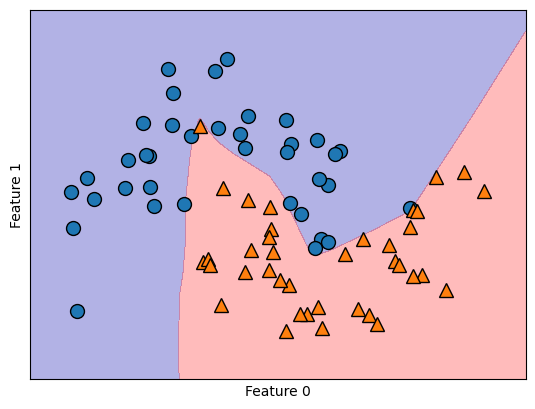

In [20]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=100,noise=0.25,random_state=3)
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=42)
mlp = MLPClassifier(solver='lbfgs',random_state=0).fit(X_train,y_train)
#使用了'lbfgs'，100个隐单元
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")


D:\Anaconda3\envs\sk-learn-py\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Text(0, 0.5, 'Feature 1')

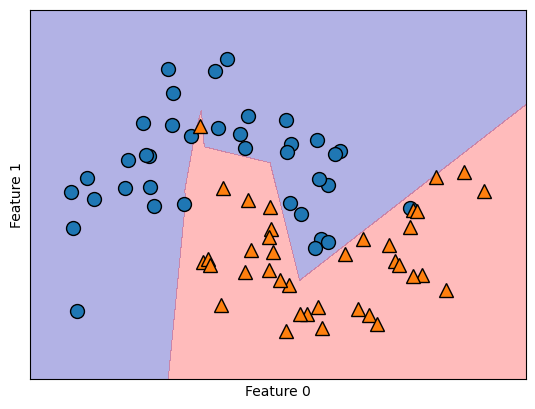

In [21]:
#当只使用10个隐单元时
mlp = MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes=[10])
mlp.fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
#默认的非线性是relu

Text(0, 0.5, 'Feature 1')

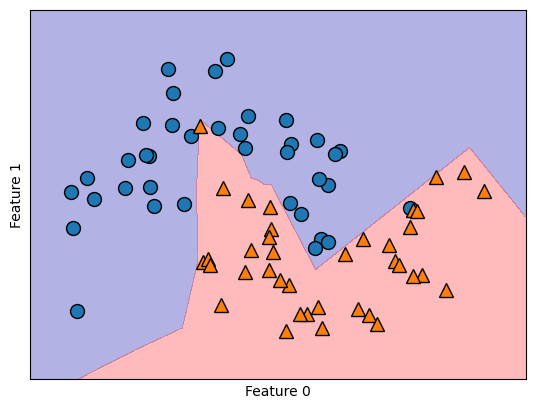

In [22]:
#使用2个隐层，每个包含10个单元
mlp = MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes=[10,10])
mlp.fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

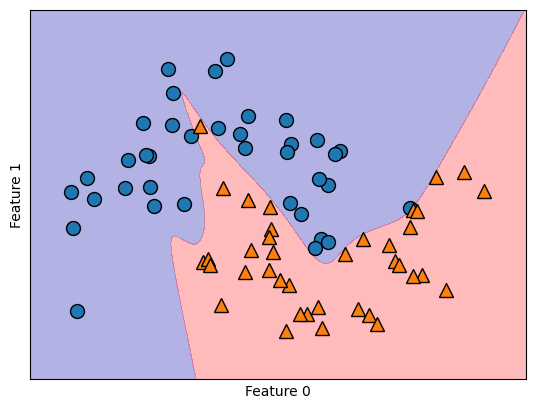

In [23]:
#使用2个隐层，每个包含10个单元，使用tanh非线性
mlp = MLPClassifier(solver='lbfgs',activation='tanh',random_state=0,hidden_layer_sizes=[10,10])
mlp.fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

D:\Anaconda3\envs\sk-learn-py\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Anaconda3\envs\sk-learn-py\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


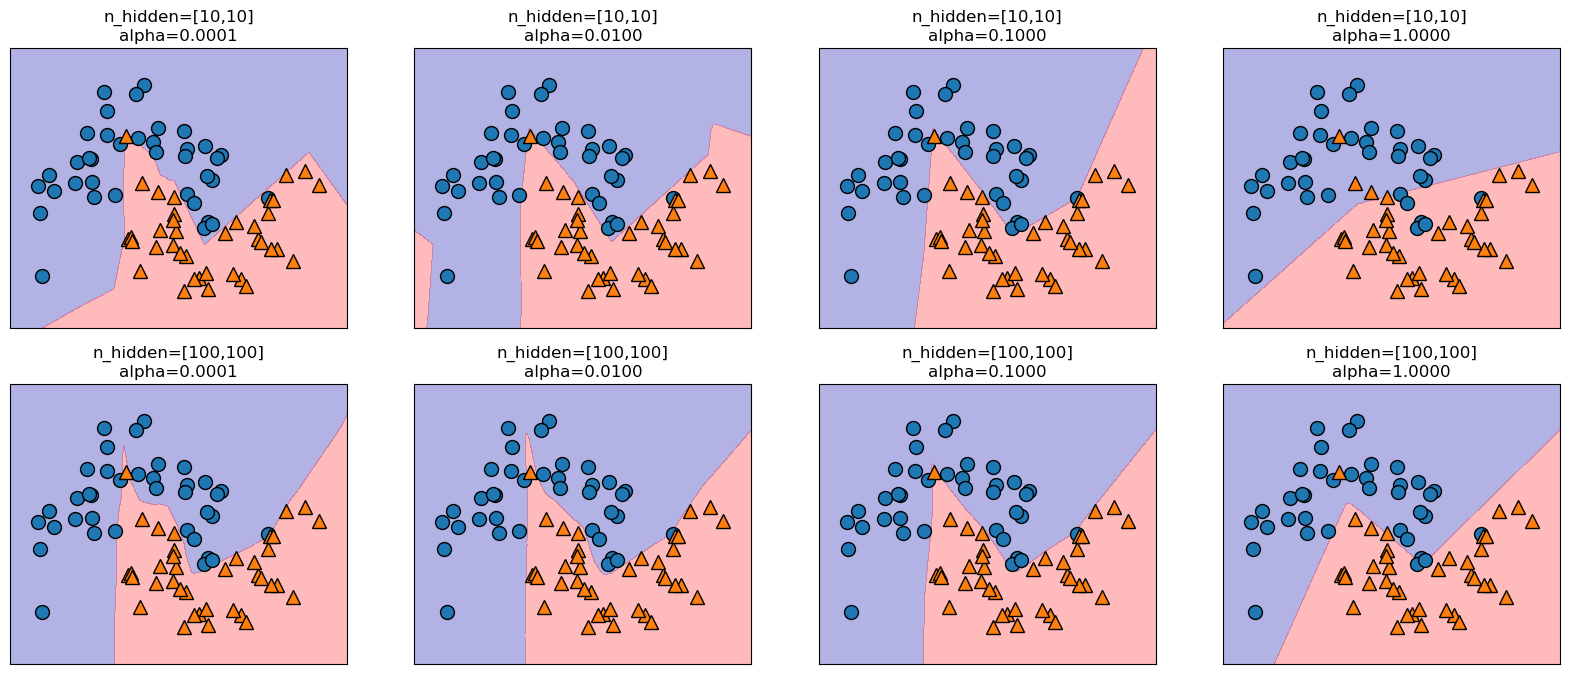

In [24]:
#使用L2惩罚，调节alpha参数

fig,axes = plt.subplots(2,4,figsize=(20,8))
for axx,n_hidden_nodes in zip(axes,[10,100]):
    for ax,alpha in zip(axx,[0.0001,0.01,0.1,1]):
        mlp = MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes=[n_hidden_nodes,n_hidden_nodes],alpha=alpha)
        mlp.fit(X_train,y_train)
        mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3,ax=ax)
        mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train,ax=ax)
        ax.set_title("n_hidden=[{},{}]\nalpha={:.4f}".format(n_hidden_nodes,n_hidden_nodes,alpha))

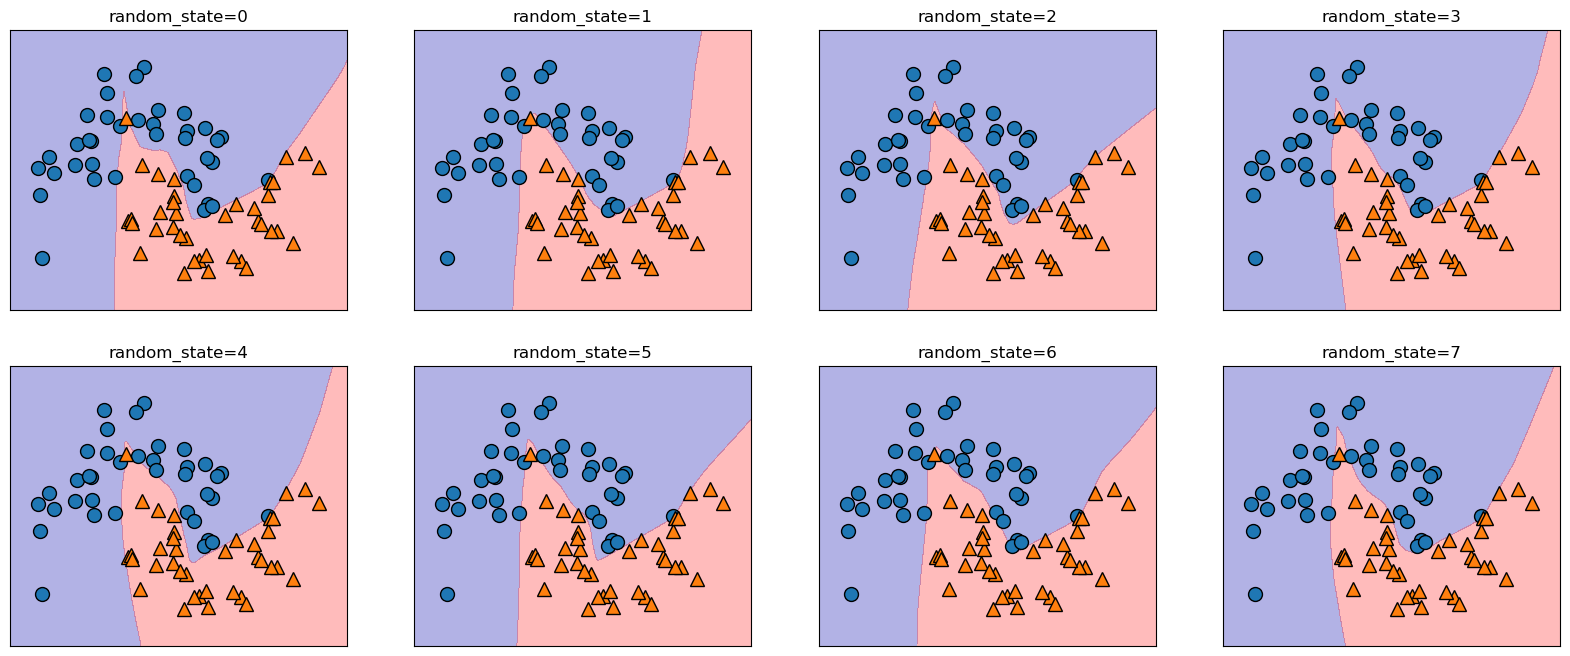

In [25]:
#随机种子的不同对模型有一定影响
fig,axes = plt.subplots(2,4,figsize=(20,8))
for i,ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs',random_state=i,hidden_layer_sizes=[100,100])
    mlp.fit(X_train,y_train)
    mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3,ax=ax)
    mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train,ax=ax)
    ax.set_title("random_state={}".format(i))


In [26]:
#应用在乳腺癌数据上
print("Cancer data per-feature maxima:\n{}".format(cancer.data.max(axis=0)))


Cancer data per-feature maxima:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [27]:
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=0)
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train,y_train)
print("Accuracy on training set:{:.2f}".format(mlp.score(X_train,y_train)))
print("Accuracy on test set:{:.2f}".format(mlp.score(X_test,y_test)))

Accuracy on training set:0.94
Accuracy on test set:0.92


In [28]:
#平均值和标准差
mean_on_train = X_train.mean(axis=0)
std_on_train = X_train.std(axis=0)
X_train_scaled = (X_train - mean_on_train) / std_on_train
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled,y_train)

print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled,y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled,y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.965


D:\Anaconda3\envs\sk-learn-py\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [29]:
#增加迭代
mlp = MLPClassifier(max_iter=1000,random_state=0)
mlp.fit(X_train_scaled,y_train)
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled,y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled,y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


In [30]:
#增大alpha参数
mlp = MLPClassifier(max_iter=1000,alpha=1,random_state=0)
mlp.fit(X_train_scaled,y_train)
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled,y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled,y_test)))


Accuracy on training set: 0.988
Accuracy on test set: 0.972


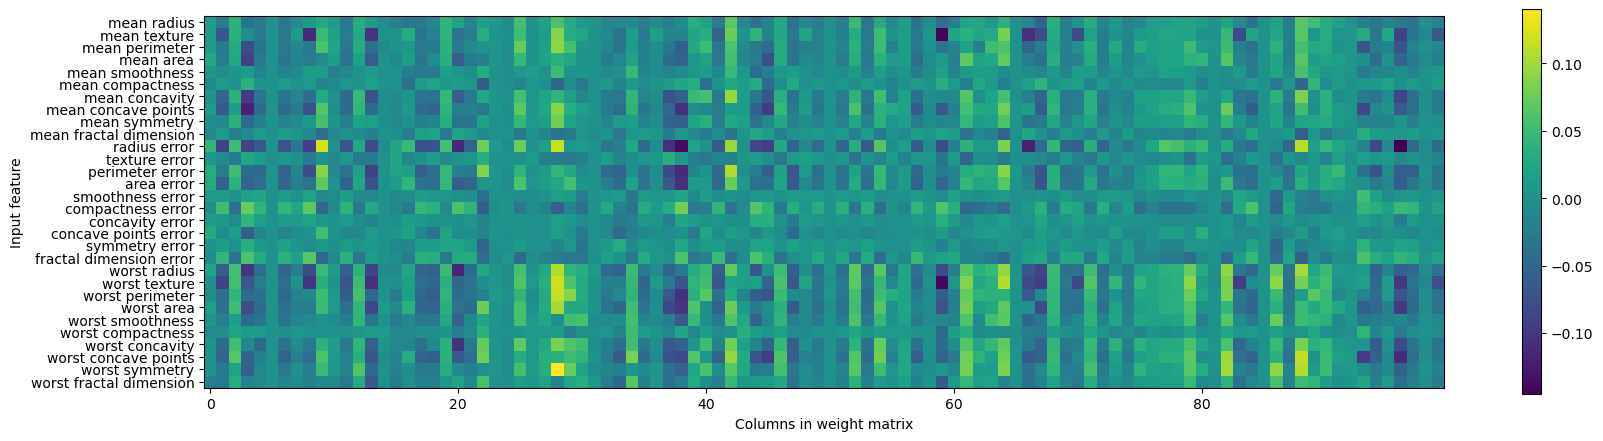

In [31]:
#第一个隐层的权重
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0],interpolation='none',cmap='viridis')
plt.yticks(range(30),cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()